In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from clustering_and_prim_tools import *

In [2]:
mydata = pd.read_csv(r'EAD.csv',header=[0,1],index_col=[0]).dropna()

In [3]:
mydata.sample(4)

desc                                                            MH  \
      full_name wbinc           GDP        length   infra_value        perc_0   
FRA      France   HIC  2.920000e+12  1.416406e+06  2.241118e+13  2.743912e+07   
LAO        Laos   LMC  1.685308e+10  4.787255e+04  3.063842e+10  1.915930e+07   
DJI    Djibouti   LMC  1.844674e+09  3.895839e+03  6.878395e+09  3.141780e+05   
GLP  Guadeloupe   UMC  8.030000e+09  5.379361e+03  1.997914e+09  6.187651e+05   

                                                                 ...        \
          perc_20       perc_40       perc_50       perc_60      ...         
FRA  5.645425e+07  1.056431e+08  1.325677e+08  1.709715e+08      ...         
LAO  2.999801e+07  4.030150e+07  4.380175e+07  5.562068e+07      ...         
DJI  7.571196e+05  1.156307e+06  1.362046e+06  1.741413e+06      ...         
GLP  9.898698e+05  1.464582e+06  1.714691e+06  2.096282e+06      ...         

               CF                                       Cyc                 \
          perc_60       perc_80      perc_100        perc_0        perc_20   
FRA  5.422553e+07  8.177422e+07  1.334318e+08      0.000000       0.000000   
LAO  0.000000e+00  0.000000e+00  0.000000e+00  30163.236568  102242.827118   
DJI  3.018614e+04  5.155085e+04  8.966898e+04      0.000000       0.000000   
GLP  1.054210e+05  1.217887e+05  1.555873e+05    500.497936    1745.368499   

                                                                                
           perc_40        perc_50        perc_60        perc_80       perc_100  
FRA       0.000000       0.000000       0.000000       0.000000       0.000000  
LAO  121122.457904  207218.462142  211966.909730  303374.775514  307892.520764  
DJI       0.000000       0.000000       0.000000       0.000000       0.000000  
GLP    2001.991745    3442.438169    3503.485554    5004.979363    5004.979363  

[4 rows x 47 columns]

In [4]:
mydata.columns

MultiIndex(levels=[['CF', 'Cyc', 'EQ', 'FU', 'MH', 'PU', 'desc'], ['GDP', 'full_name', 'infra_value', 'length', 'perc_0', 'perc_100', 'perc_20', 'perc_40', 'perc_50', 'perc_60', 'perc_80', 'wbinc']],
           labels=[[6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [1, 11, 0, 3, 2, 4, 6, 7, 8, 9, 10, 5, 4, 6, 7, 8, 9, 10, 5, 4, 6, 7, 8, 9, 10, 5, 4, 6, 7, 8, 9, 10, 5, 4, 6, 7, 8, 9, 10, 5, 4, 6, 7, 8, 9, 10, 5]])

In [38]:
basic_data = mydata['desc'].copy()

In [39]:
basic_data = basic_data[basic_data.GDP>0].copy()

In [40]:
hazard_data = mydata[['CF', 'Cyc', 'EQ', 'FU', 'MH', 'PU']]

In [41]:
total_EAD = hazard_data.stack(0)['perc_50'].sum(level=0).copy()

In [42]:
basic_data.loc[:,'total_EAD'] = total_EAD[total_EAD>0].copy()

In [43]:
basic_data['EAD_per_infra'] = basic_data.total_EAD/basic_data.infra_value
basic_data['EAD_per_GDP'] = basic_data.total_EAD/basic_data.GDP
basic_data['EAD_per_km'] = basic_data.total_EAD/basic_data.length

In [47]:
basic_data = basic_data.dropna()

In [48]:
basic_data.sample(3)

,full_name,wbinc,GDP,length,infra_value,total_EAD,EAD_per_infra,EAD_per_GDP,EAD_per_km
AGO,Angola,LMC,1.270000e+11,137734.236685,1.754296e+11,3.768520e+07,2.148166e-04,2.967339e-04,273.608083
GHA,Ghana,LMC,4.780507e+10,115499.044933,1.136144e+11,2.930846e+07,2.579642e-04,6.130826e-04,253.754978
BWA,Botswana,UMC,1.740653e+10,61405.433986,8.997890e+10,4.490989e+00,4.991158e-11,2.580060e-10,0.000073


In [49]:
basic_data[['EAD_per_infra','EAD_per_GDP','EAD_per_km','total_EAD']].describe()

,EAD_per_infra,EAD_per_GDP,EAD_per_km,total_EAD
count,2.170000e+02,2.170000e+02,217.000000,2.170000e+02
mean,7.281520e-04,1.094172e-03,547.069925,1.208580e+08
std,1.416336e-03,1.558376e-03,686.363079,4.961566e+08
min,4.991158e-11,2.580060e-10,0.000073,4.490989e+00
25%,4.866641e-05,8.337239e-05,108.622544,2.675160e+06
50%,2.214301e-04,4.140670e-04,336.017310,1.707329e+07
75%,7.829878e-04,1.343162e-03,687.891749,6.137860e+07
max,1.298264e-02,8.453650e-03,4300.238397,6.187677e+09


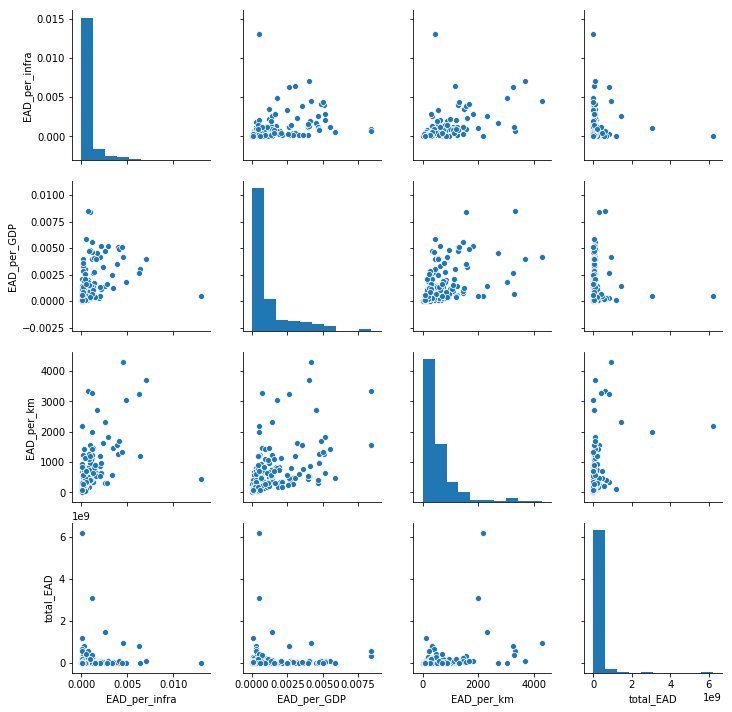

In [50]:
sns.pairplot(basic_data[['EAD_per_infra','EAD_per_GDP','EAD_per_km','total_EAD']])

In [51]:
oois = ['EAD_per_infra','EAD_per_GDP','EAD_per_km','total_EAD']

outcomes = basic_data[['EAD_per_infra','EAD_per_GDP','EAD_per_km','total_EAD']].copy()

data = np.array([[outcomes[oois[0]][i],outcomes[oois[1]][i],outcomes[oois[2]][i],outcomes[oois[3]][i]] for i in range(len(outcomes))])
data = normalize(data)

In [52]:
from sklearn import mixture

aic = []
bic = []
max_components = 15
x = [x for x in range(1,max_components)]

for nc in x:
    g = mixture.GaussianMixture(n_components=int(nc))
    g.fit(data)
    if g.converged_:
        aic.append(g.aic(data))
        bic.append(g.bic(data))
    else:
        aic.append(None)
        bic.append(None)

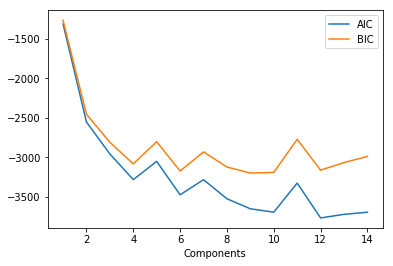

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, aic, label='AIC')
ax.plot(x, bic, label='BIC')
ax.legend(loc='best')
ax.set_xlabel('Components')

plt.show()

In [54]:
n_clusters = 12

g = mixture.GaussianMixture(n_components=n_clusters)
g.fit(data)
pred = g.predict(data)

In [55]:
import matplotlib.ticker as ticker

def make_parallel_plot(data, labels):

    fig = plt.figure()
    axes = []
    
    for i in range(1, data.shape[1]):
        ax = fig.add_subplot(1,data.shape[1]-1,i,  ylim=(-0.1,1.1))
        axes.append(ax)
        ax.set_xlim([i,i+1])
        ax.xaxis.set_major_locator(ticker.FixedLocator([i]))
        ax.xaxis.set_ticklabels([labels[i-1]])
        ax.xaxis.set_tick_params(bottom=False, top=False)
        
        ax.yaxis.set_ticks([])
        ax.text(i, 1.01, "1", va="bottom", ha="center")
        ax.text(i, -0.01, "0", va="top", ha="center")
        
        ax.spines['left'].set_bounds(0, 1)
        ax.spines['right'].set_bounds(0, 1)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

    ax.spines['right'].set_bounds(0, 1)
    ax.xaxis.set_major_locator(ticker.FixedLocator([i, i+1]))
    ax.xaxis.set_ticklabels(labels[i-1:i+1])
    ax.text(i+1, 1.01, "1", va="bottom", ha="center")
    ax.text(i+1, -0.01, "0", va="top", ha="center")
    
    for tick in ax.yaxis.get_major_ticks():
        tick.label2On=True
    
    plt.subplots_adjust(wspace=0)
    
    return fig, axes


def plot_data_parallel(data, labels, classes):
    C = set(classes)
    C = list(C)
    C.sort()
    
    norm_data = normalize(data)
    figures = []
    for index, Ci in enumerate(C):
        fig, axes = make_parallel_plot(data, labels)
        fig.suptitle('class {}'.format(Ci), fontsize=20)
        figures.append(fig)
        logical = classes==Ci
        
        for i,j in zip(range(data.shape[1]-1),range(1,data.shape[1])):
            ax = axes[i]
            y = norm_data[logical==False, i:j+1]
            x = np.tile([i+1,j+1], (data.shape[0], 1))
            ax.plot(x.T, y.T, c='#C0C0C0')
            
            y = norm_data[logical, i:j+1]
            x = np.tile([i+1,j+1], (data.shape[0], 1))
            ax.plot(x.T, y.T, c='b')
            
    return figures

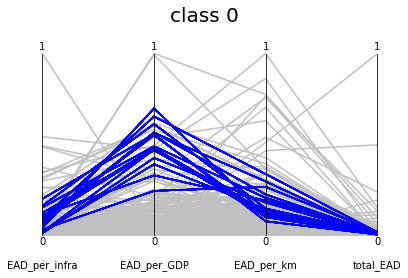

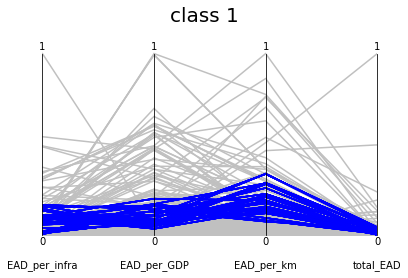

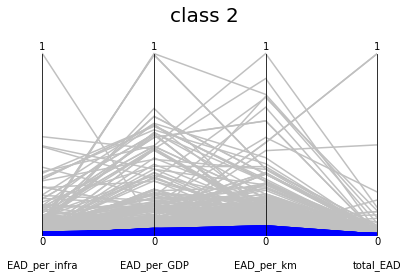

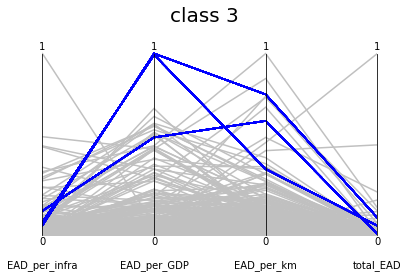

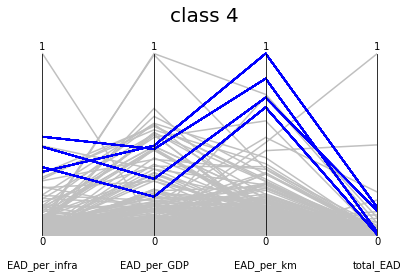

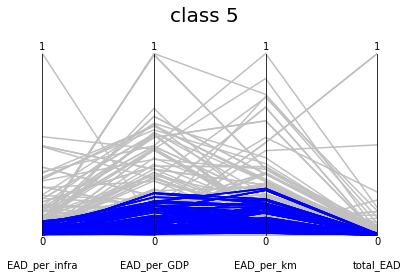

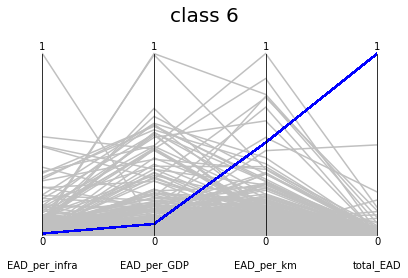

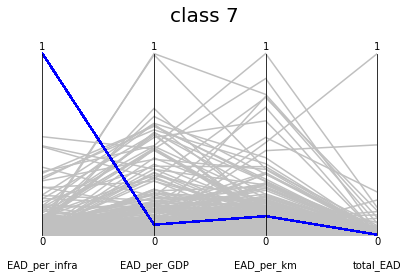

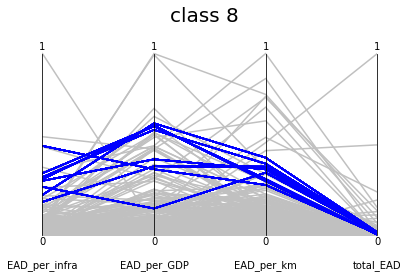

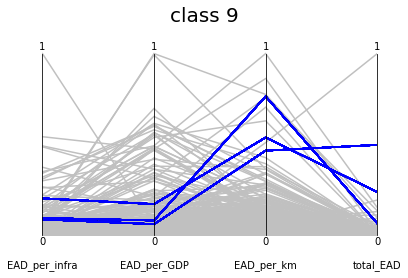

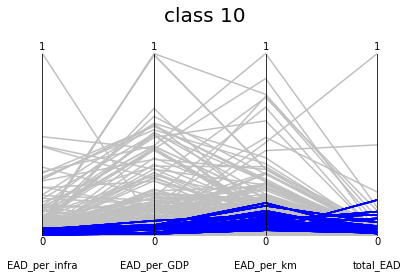

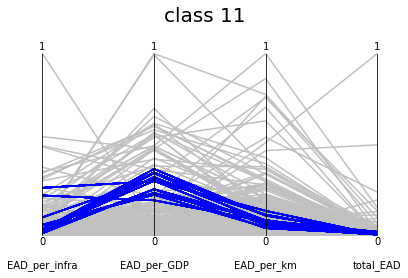

In [56]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

labels = ['EAD_per_infra','EAD_per_GDP','EAD_per_km','total_EAD']

plot_data_parallel(data, labels, pred)
plt.show()

In [57]:
basic_data["class_number"] = pred

In [70]:
basic_data.loc[basic_data.class_number==0,['full_name','wbinc','class_number']]

,full_name,wbinc,class_number
AFG,Afghanistan,LIC,0
CAF,Central African Republic,LIC,0
ESH,Western Sahara,LIC,0
GEO,Georgia,LMC,0
GMB,Gambia,LIC,0
KHM,Cambodia,LMC,0
LBR,Liberia,LIC,0
MDA,Moldova,LMC,0
MDG,Madagascar,LIC,0
MLI,Mali,LIC,0


In [71]:
basic_data.loc[basic_data.class_number==1,['full_name','wbinc','class_number']]

,full_name,wbinc,class_number
ALB,Albania,UMC,1
BGD,Bangladesh,LMC,1
CHL,Chile,HIC,1
COL,Colombia,UMC,1
CYM,Cayman Islands,HIC,1
DOM,Dominican Republic,UMC,1
ECU,Ecuador,UMC,1
EGY,Egypt,LMC,1
GGY,Guernsey,HIC,1
GLP,Guadeloupe,UMC,1


In [72]:
basic_data.loc[basic_data.class_number==2,['full_name','wbinc','class_number']]

,full_name,wbinc,class_number
ABW,Aruba,HIC,2
AIA,Anguilla,UMC,2
ASM,American Samoa,UMC,2
BHR,Bahrain,HIC,2
BLR,Belarus,UMC,2
BMU,Bermuda,HIC,2
BRB,Barbados,HIC,2
BWA,Botswana,UMC,2
COM,Comoros,LIC,2
CUW,Curaçao,HIC,2


In [73]:
basic_data.loc[basic_data.class_number==3,['full_name','wbinc','class_number']]

,full_name,wbinc,class_number
BOL,Bolivia,LMC,3
FJI,Fiji,UMC,3
MMR,Myanmar,LMC,3


In [74]:
basic_data.loc[basic_data.class_number==4,['full_name','wbinc','class_number']]

,full_name,wbinc,class_number
GUF,French Guiana,LMC,4
PHL,Philippines,LMC,4
PNG,Papua New Guinea,LMC,4
VNM,Vietnam,LMC,4


In [75]:
basic_data.loc[basic_data.class_number==5,['full_name','wbinc','class_number']]

,full_name,wbinc,class_number
AGO,Angola,LMC,5
AND,Andorra,HIC,5
ARE,United Arab Emirates,HIC,5
ARM,Armenia,UMC,5
ATG,Antigua and Barbuda,HIC,5
AZE,Azerbaijan,UMC,5
BEN,Benin,LIC,5
BES,"Bonaire, Sint Eustatius and Saba",UMC,5
BFA,Burkina Faso,LIC,5
BGR,Bulgaria,UMC,5


In [76]:
basic_data.loc[basic_data.class_number==6,['full_name','wbinc','class_number']]

,full_name,wbinc,class_number
CHN,China,UMC,6


In [77]:
basic_data.loc[basic_data.class_number==7,['full_name','wbinc','class_number']]

,full_name,wbinc,class_number
MHL,Marshall Islands,UMC,7


In [78]:
basic_data.loc[basic_data.class_number==8,['full_name','wbinc','class_number']]

,full_name,wbinc,class_number
BLZ,Belize,UMC,8
CRI,Costa Rica,UMC,8
HND,Honduras,LMC,8
HTI,Haiti,LIC,8
LAO,Laos,LMC,8
NIC,Nicaragua,LMC,8
SSD,South Sudan,LIC,8
VUT,Vanuatu,LMC,8


In [79]:
basic_data.loc[basic_data.class_number==9,['full_name','wbinc','class_number']]

,full_name,wbinc,class_number
IDN,Indonesia,LMC,9
JPN,Japan,HIC,9
TWN,Taiwan,HIC,9


In [80]:
basic_data.loc[basic_data.class_number==10,['full_name','wbinc','class_number']]

,full_name,wbinc,class_number
ARG,Argentina,HIC,10
AUS,Australia,HIC,10
AUT,Austria,HIC,10
BEL,Belgium,HIC,10
BRA,Brazil,UMC,10
CAN,Canada,HIC,10
CHE,Switzerland,HIC,10
DEU,Germany,HIC,10
ESP,Spain,HIC,10
FRA,France,HIC,10


In [81]:
basic_data.loc[basic_data.class_number==11,['full_name','wbinc','class_number']]

,full_name,wbinc,class_number
BDI,Burundi,LIC,11
BTN,Bhutan,LMC,11
COD,Democratic Republic of the Congo,LIC,11
FLK,Falkland Islands,HIC,11
GIN,Guinea,LIC,11
GNB,Guinea-Bissau,LIC,11
KGZ,Kyrgyzstan,LMC,11
MNG,Mongolia,LMC,11
MOZ,Mozambique,LIC,11
MWI,Malawi,LIC,11
